# Understanding Descriptive Statistics

Import the necessary libraries here:

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [200]:
import random


def dice_roll():

    die = [1,2,3,4,5,6]

    roll = pd.DataFrame(random.choices (die, k=10))

    return roll


In [201]:
roll_df = dice_roll()

#### 2.- Plot the results sorted by value.

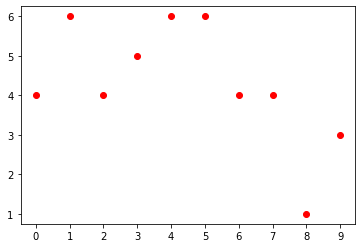

In [202]:


plt.plot(roll_df, 'ro')
plt.xticks(np.arange(0, 10))
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

4    4
6    3
1    1
3    1
5    1
dtype: int64


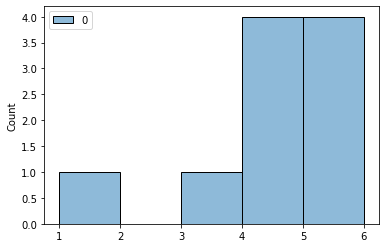

In [203]:
print(roll_df.value_counts())

sns.histplot(roll_df)
plt.show()

In [204]:
"""

The first plots every result, the histogram aggregates them

"""

'\n\nThe first plots every result, the histogram aggregates them\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [205]:
roll_df

def average(df):

    return df.sum() / len(df)


average(roll_df)

0    4.3
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [206]:
freq_dist = pd.DataFrame(roll_df.value_counts())

In [207]:
freq_dist.columns = ['frequency']

In [208]:
freq_dist = freq_dist.reset_index()

In [209]:
freq_dist.columns = ['value','frequency']

In [210]:
freq_dist

,value,frequency
0,4,4
1,6,3
2,1,1
3,3,1
4,5,1


In [211]:
def freq_distribution(df,column1,column2):

    total = 0

    for i in range(len(df)):

        total += df[column1][i] * freq_dist[column2][i]

    return total/np.sum(df[column2])
     



In [212]:
freq_distribution(freq_dist,'value','frequency')

4.3


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [213]:
def median(df):

    results = list(df[0])
    results.sort()


    if len(results) % 2 == 0:

        return (results[int(len(results)/2)-1] + results[(int(len(results)/2))]) / 2 ## for even
    
    else:

        return results[int((len(results)/2))] # for odd

    
median(roll_df)


4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [214]:
# just to check

print(np.quantile(roll_df, q = 0.25))
print(np.quantile(roll_df, q = 0.5))
print(np.quantile(roll_df, q = 0.75))

4.0
4.0
5.75


In [219]:
def quartiles(df): ## ignore

    if len(df) % 2 == 0:

        return [df[i] for i in range(int(len(df) / 2))]

    else:

        return [df[i] for i in range(int((len(df))+1) / 2)]



In [220]:
quartiles(roll_df)

KeyError: 1

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [221]:
rolls = pd.read_csv('../data/roll_the_dice_hundred.csv')
rolls.drop('Unnamed: 0', inplace=True, axis = 1)

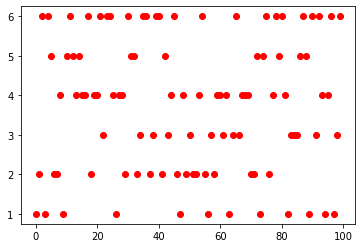

In [ ]:
plt.plot(rolls['roll'],rolls['value'], 'ro')
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
average(rolls['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [226]:
rolls['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

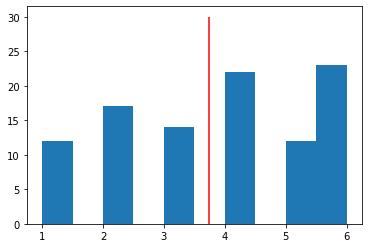

In [231]:
plt.hist(rolls['value'])

plt.vlines(average(rolls['value']), ymin = 0, ymax = 30, colors = 'r')

plt.show()



In [ ]:
"""
can't find it, check this later

"""

"\ncan't find it, check this later\n\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [232]:
rolls_1000 = pd.read_csv('/Users/ruiferreira/Desktop/Universe/Ironhack/Bootcamp/Labs/Week 4/Completed/Descriptive-Stats/data/roll_the_dice_thousand.csv')

In [233]:
rolls_1000['value'].value_counts()

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [234]:
"""

Less dispersion as we increase the number of rolls

"""

'\n\nLess dispersion as we increase the number of rolls\n\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

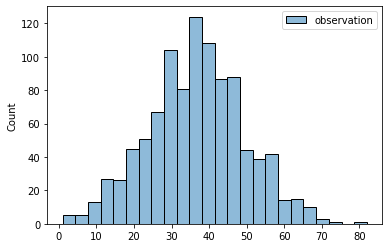

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
73.0     1
82.0     1
70.0     1
71.0     1
69.0     1
Name: observation, Length: 72, dtype: int64

In [236]:
ages = pd.read_csv('/Users/ruiferreira/Desktop/Universe/Ironhack/Bootcamp/Labs/Week 4/Completed/Descriptive-Stats/data/ages_population.csv')

sns.histplot(ages)
plt.show()

# guess: mean: 39 // std_dev: 20

ages['observation'].value_counts()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
print(ages.mean())

print(ages.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

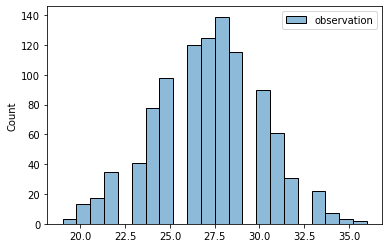

In [ ]:
ages_2 = pd.read_csv('/Users/ruiferreira/Desktop/Universe/Ironhack/Bootcamp/Labs/Week 4/Completed/Descriptive-Stats/data/ages_population2.csv')

sns.histplot(ages_2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Shorter range of ages

"""

'\nShorter range of ages\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
print(ages_2.mean())

print(ages_2.std())

## adds up

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [ ]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

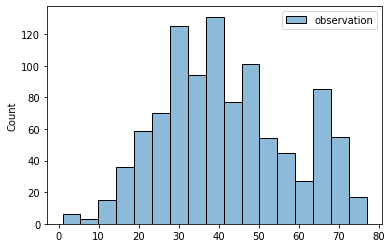

In [ ]:
ages_3 = pd.read_csv('/Users/ruiferreira/Desktop/Universe/Ironhack/Bootcamp/Labs/Week 4/Completed/Descriptive-Stats/data/ages_population3.csv')

sns.histplot(ages_3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
print(ages_3.mean())

print(ages_3.std())


observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
It's positively skewed and more dispersion

"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
## Quartiles

q1 = np.quantile(ages_3, 0.25)

print('The first quartile is',q1)


q2 = np.quantile(ages_3,0.5) ## this is the median
 
print('The second quartile is', q2)


q3 = np.quantile(ages_3,0.75)

print('The third quartile is', q3)


The first quartile is 30.0
The second quartile is 40.0
The third quartile is 53.0


In [ ]:
"""

~ 2 years difference

"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

'\nyour comments here\n'